## Exercise 0

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from time import time
from utils import *
# To access the functions of this notebook, ctrl + click on them


### Exercise 0.1

Write a method that generates P balanced random patterns $p^{\mu} \in \{ -1, 1 \}^N$, each containing an
equal number of +1s and −1s.

In [2]:
np.random.seed(42)
# Example
P = 50
N = 3000

patterns = gen_balanced_patterns(P,N)

print(patterns.shape)

(50, 3000)


### Exercise 0.2

Write a method that computes the next state $S(t + 1)$ of the network, given the current state $S(t) = (S_1(t), . . . , S_N (t))$ and a set of patterns $p^1, . . . , p^P$, according to Eqs. 1-2.


### Exercise 0.3

In [3]:
# Time comparison
np.random.seed(42)
S = np.ones((N,1))

start = time()

next, _ = next_state(S, patterns)

stop = time()

acc_next, _ = acc_next_state(S, patterns)

end = time()

print('Time first alg :', stop - start)
print('Time 2nd alg :', end - stop)


Time first alg : 0.03686952590942383
Time 2nd alg : 0.0137786865234375


## Exercise 1

### Exercise 1.1

In [4]:
np.random.seed(42)
# Create Hopfield network
patterns = gen_balanced_patterns(P=5, N=300)
S = patterns[0].copy()

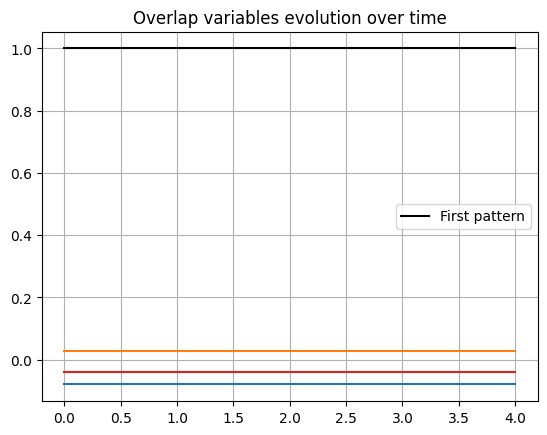

In [ ]:
np.random.seed(42)
m_list = []
T = 5

for t in np.arange(T) :
	S, m = acc_next_state(S, patterns)
	m_list.append(m)
m_list = np.array(m_list)

plot_overlap_variables(T, m_list)

# Change display to make it cleaner
# All variables stay constant over time, since the state is equal to one pattern 
# it stays where it is and there's no update
# overlap variable is 1 where the pattern is exactly equal to the state,
# here since S = patterns[0] then the first overlap variable is 1
# This plot is useful to compare all the patterns to the first pattern


### Exercise 1.2

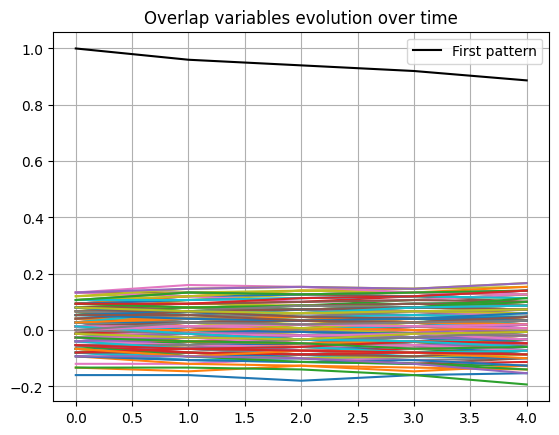

In [ ]:
np.random.seed(42)
patterns = gen_balanced_patterns(P=200, N=300)
S = patterns[0].copy()
m_list = []
T = 5

for t in np.arange(T) :
	S, m = acc_next_state(S, patterns)
	m_list.append(m)
m_list = np.array(m_list)
# print(m_list)
plot_overlap_variables(T, m_list)

### Exercise 1.3

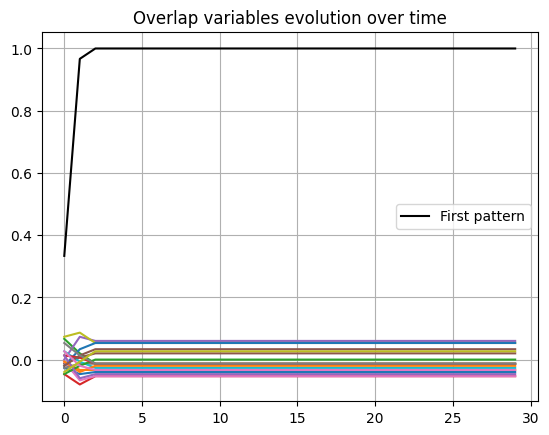

In [ ]:
np.random.seed(42)
patterns = gen_balanced_patterns(P=20, N=600)
S = patterns[0].copy()
idx_flip = np.random.choice(600, size=200, replace=False)
S[idx_flip] *= -1
m_list = []
T = 30

for t in np.arange(T) :
	S, m = acc_next_state(S, patterns)
	m_list.append(m)
m_list = np.array(m_list)
# print(m_list)
plot_overlap_variables(T,m_list)

### Exercise 1.4

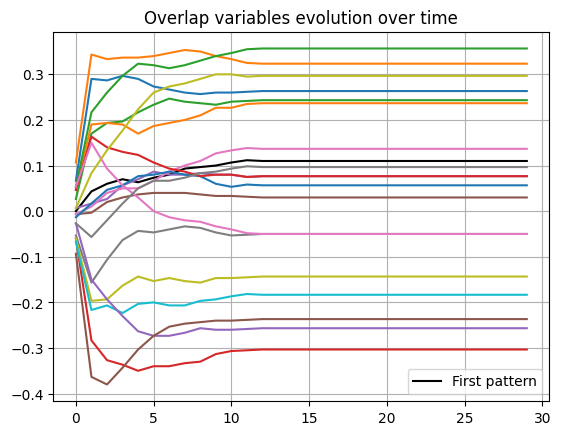

In [ ]:
np.random.seed(4)
patterns = gen_balanced_patterns(P=20, N=600)
S = patterns[0].copy()
idx_flip = np.random.choice(600, size=300, replace=False)
S[idx_flip] *= -1

m_list = []
T = 30

for t in np.arange(T) :
	S, m = acc_next_state(S, patterns)
	m_list.append(m)
m_list = np.array(m_list)
plot_overlap_variables(T,m_list)

### Exercise 1.5

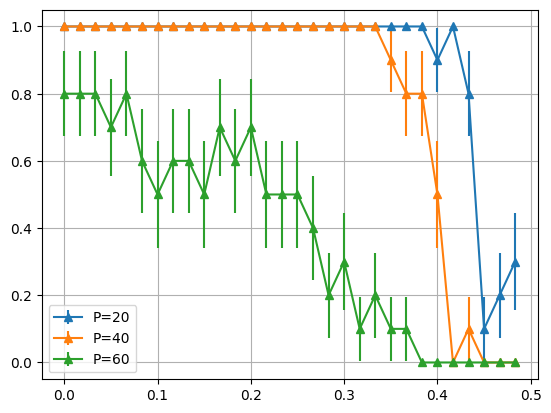

In [ ]:
np.random.seed(42)
n_flip = np.arange(0,300,10) # (0,300,30) initially, but more data points are more accurate
P_list = np.array([20,40,60])
iter = 10 # 5 iterations initially
N = 600 # Not specified but assuming it's the same as for 1.3 and 1.4
T = 30 # Again assuming it's the same as above

# This array will contain every number of correctly retrieved patterns for every pattern number,
# for every n_flip, for every iteration
correct_array = np.zeros((iter, P_list.shape[0], n_flip.shape[0]))

for i in np.arange(iter) :
	for P_idx, P in enumerate(P_list) :
		patterns = gen_balanced_patterns(P,N)
		for n_idx, n in enumerate(n_flip) :
			S = patterns[0].copy() # Again assuming init state is this one, but flipped
			idx_flip = np.random.choice(N, size=n, replace=False)
			S[idx_flip] *= -1
			for t in np.arange(T) :
				S, m = acc_next_state(S, patterns)
			
			# print(m)
			# Here, m = overlap variables for all patterns at the last iteration
			# Check number of correctly retrieved patterns
			# An inequality condition was used because strict equality did not work
			# because of representation differences
			correct = (m >= 1).sum()

			# Assign this value to the array
			correct_array[i,P_idx,n_idx] = correct

# Compute statistics on the iteration level of the array
mean_array = np.mean(correct_array, axis=0)
std_array = np.std(correct_array,axis=0)
# Get standard error instead of standard deviation
std_array /= np.sqrt(iter)

# CHANGE ITERATIONS AND N_FLIP TO GET MORE VALUES AND JUSTIFY IN REPORT
# print(correct_array)

# x-axis
x = n_flip / N
# print(x.shape)
# print(mean_array.shape)
# print(std_array.shape)

plt.figure()
for i,p in enumerate(P_list) :
	plt.errorbar(x, y=mean_array[i], yerr=std_array[i], marker='^', label=f'P={p}')

plt.grid()
plt.legend()
plt.show()

### Exercise 1.6

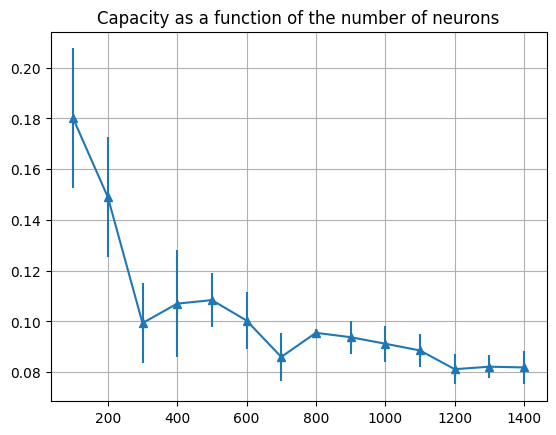

In [ ]:
np.random.seed(42)
iter = 5
N_list = np.arange(100,1500,100)
T = 30 

# This array will contain every number of correctly retrieved patterns for every pattern number,
# for every n_flip, for every iteration
capacity_array = np.zeros((iter, N_list.shape[0]))

for i in np.arange(iter) :
	P = 1
	for N_idx, N in enumerate(N_list) :
		max_P = 0
		while max_P == 0 :
			patterns = gen_balanced_patterns(P,N)
			S = patterns[0].copy()
			for t in np.arange(2) :
				S, m = acc_next_state(S, patterns)
			if m[0] < 1 :
				max_P = P
				capacity_array[i,N_idx] = max_P
				capacity_array[i, N_idx] /= N
			else :
				P+= 1


# capacity_array /= N_list
# Compute statistics on the iteration level of the array
mean_array = np.mean(capacity_array, axis=0)
std_array = np.std(capacity_array,axis=0)


plt.figure()
plt.title('Capacity as a function of the number of neurons')
plt.errorbar(N_list, y=mean_array, yerr=std_array, marker='^')
plt.grid()
plt.show()

## Exercise 2

### Exercise 2.1

In [11]:
# Look at utils.py file

### Exercise 2.2

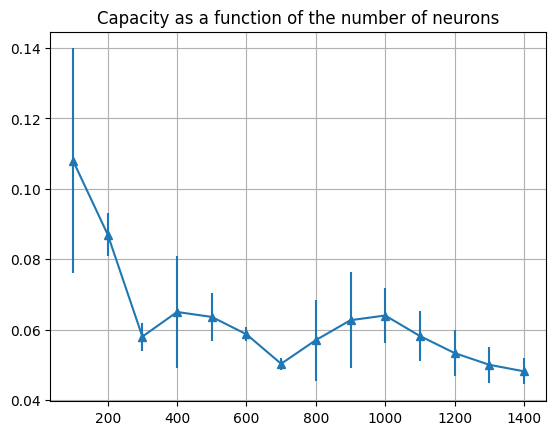

In [ ]:
np.random.seed(42)
iter = 5
N_list = np.arange(100,1500,100)
T = 30 

# This array will contain every number of correctly retrieved patterns for every pattern number,
# for every n_flip, for every iteration
capacity_array = np.zeros((iter, N_list.shape[0]))

for i in np.arange(iter) :
	P = 1
	for N_idx, N in enumerate(N_list) :
		max_P = 0
		C = gen_dilution_mask(N)
		while max_P == 0 :
			patterns = gen_balanced_patterns(P,N)
			for j,pattern in enumerate(patterns) :
				S = pattern.copy() # Assume initial state is the same as before			
				for t in np.arange(2) :	
					S, m = overlap_and_next_state(S,patterns,C)
				if m[j] < 1 :
					# print('found it !', m[0], P)
					max_P = P
					capacity_array[i,N_idx] = max_P
					capacity_array[i,N_idx] /= N
					break # No need to check the other patterns
				else :
					P+= 1

# Compute statistics on the iteration level of the array
mean_array = np.mean(capacity_array, axis=0)
std_array = np.std(capacity_array,axis=0)

plt.figure()
plt.title('Capacity as a function of the number of neurons')
plt.errorbar(N_list, y=mean_array, yerr=std_array, marker='^')
plt.grid()
plt.show()

### Exercise 2.3

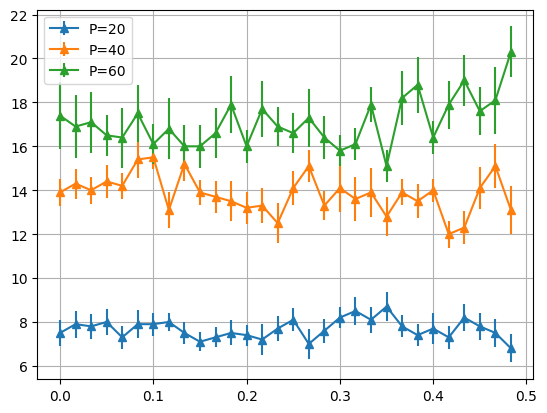

In [ ]:
np.random.seed(42)
n_flip = np.arange(0,300,10) # (0,300,30) initially, but more data points are more accurate
P_list = np.array([20,40,60])
iter = 10 # 5 iterations initially
N = 600 # Not specified but assuming it's the same as for 1.3 and 1.4
T = 30 # Again assuming it's the same as above

# This array will contain every number of correctly retrieved patterns for every pattern number,
# for every n_flip, for every iteration
correct_array = np.zeros((iter, P_list.shape[0], n_flip.shape[0]))

for i in np.arange(iter) :
	for P_idx, P in enumerate(P_list) :
		patterns = gen_balanced_patterns(P,N)
		C = gen_dilution_mask(N)
		masked_patterns = (C @ patterns.T).T
		for n_idx, n in enumerate(n_flip) :
			S = masked_patterns[0].copy() # Again assuming init state is this one, but flipped
			idx_flip = np.random.choice(N, size=n, replace=False)
			S[idx_flip] *= -1
			for t in np.arange(T) :
				S, m = acc_next_state(S, masked_patterns)
			
			# print(m)
			# Here, m = overlap variables for all patterns at the last iteration
			# Check number of correctly retrieved patterns
			# An inequality condition was used because strict equality did not work
			# because of representation differences
			correct = (m >= 1).sum()

			# Assign this value to the array
			correct_array[i,P_idx,n_idx] = correct

# Compute statistics on the iteration level of the array
mean_array = np.mean(correct_array, axis=0)
std_array = np.std(correct_array,axis=0)
# Get standard error instead of standard deviation
std_array /= np.sqrt(iter)

# CHANGE ITERATIONS AND N_FLIP TO GET MORE VALUES AND JUSTIFY IN REPORT
# print(correct_array)

# x-axis
x = n_flip / N
# print(x.shape)
# print(mean_array.shape)
# print(std_array.shape)

plt.figure()
for i,p in enumerate(P_list) :
	plt.errorbar(x, y=mean_array[i], yerr=std_array[i], marker='^', label=f'P={p}')

plt.grid()
plt.legend()
plt.show()

## Exercise 3

### Exercise 3.1

beta = 1.5


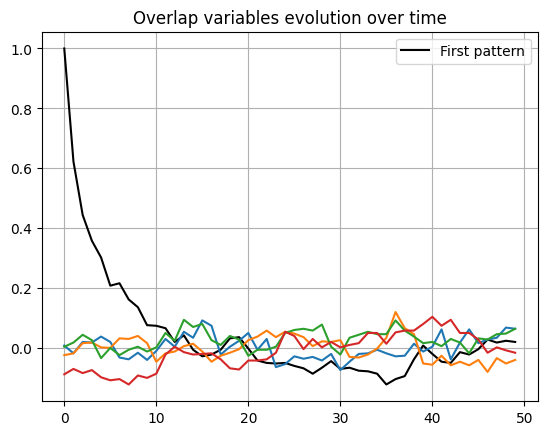

beta = 2.5


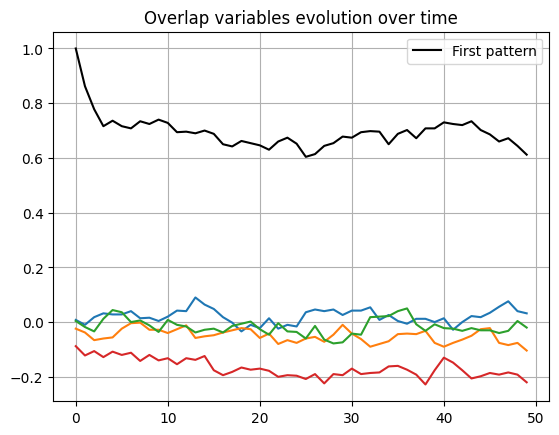

beta = 3.5


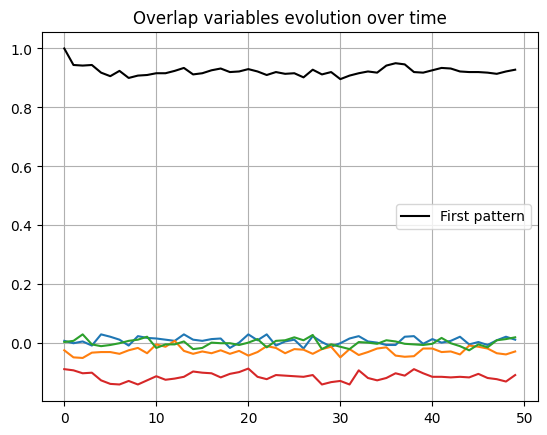

In [ ]:
np.random.seed(42)
N = 1000
P = 5
T = 50
beta_list = np.array([1.5, 2.5, 3.5])

patterns = gen_balanced_patterns(P,N)

sigma_0 = 0.5 * (patterns[0] + 1)

results = np.zeros((beta_list.shape[0], T, P))

for idx_beta, beta in enumerate(beta_list) :
	sigma = sigma_0.copy()
	
	for t in np.arange(T) :
		m = (2 / N) * patterns @ sigma
		results[idx_beta, t, :] = m

		h = 0.5 * patterns.T @ m

		prob = 0.5 * (1 + np.tanh(beta * h))
		sigma = (np.random.rand(N) < prob).astype(int)
	
	print(f'beta = {beta}')
	plot_overlap_variables(T, results[idx_beta, :, :]) # Add legend in report
	


### Exercise 3.2

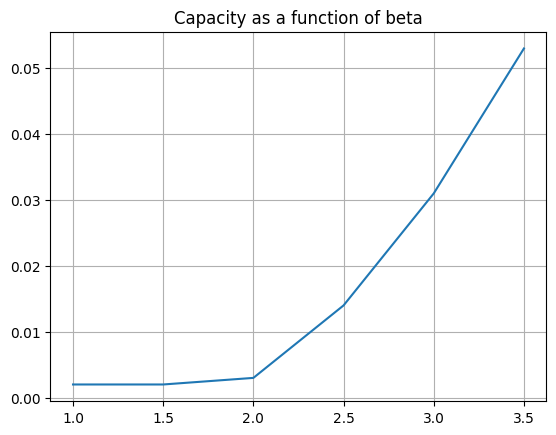

In [ ]:
np.random.seed(42)
beta_list = np.arange(1.0, 4.0, 0.5)
N = 1000

capacity_array_3_2 = np.zeros((beta_list.shape[0]))

for i, beta in enumerate(beta_list):
	P = 1
	max_P = 0
	while max_P == 0:
		patterns = gen_balanced_patterns(P, N)
		success_all = True
		for j, pattern in enumerate(patterns):
			sigma = 0.5 * (pattern.copy() + 1)
			argmax_history = []
			for t in range(50):
				m = (2 / N) * patterns @ sigma
				h = 0.5 * patterns.T @ m
				prob = 0.5 * (1 + np.tanh(beta * h))
				sigma = (np.random.rand(N) < prob).astype(int)
				current_argmax = np.argmax(m)
				argmax_history.append(current_argmax)
			
			# Most relevant timesteps are the last ten
			last_10 = argmax_history[-10:]
			success_j = all(x == j for x in last_10)

			if not success_j:
				# print('found it!', m, P)
				success_all = False
				break  
		
		if not success_all:
			max_P = P 
			capacity_array_3_2[i] = max_P
			capacity_array_3_2[i] /= N
		else:
			P += 1 
			# print(P)

plt.figure()
plt.title('Capacity as a function of beta')
plt.plot(beta_list, capacity_array_3_2)
plt.grid()
plt.show()

### Exercise 3.4

beta = 7


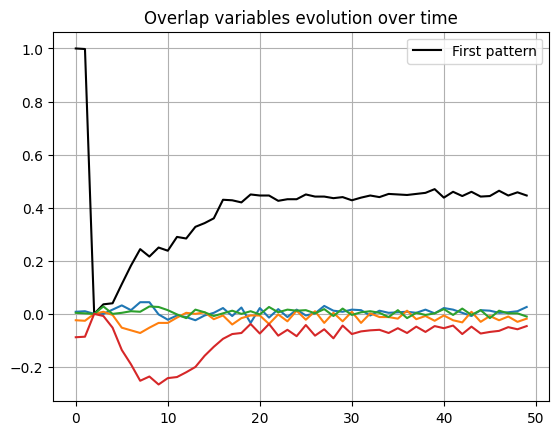

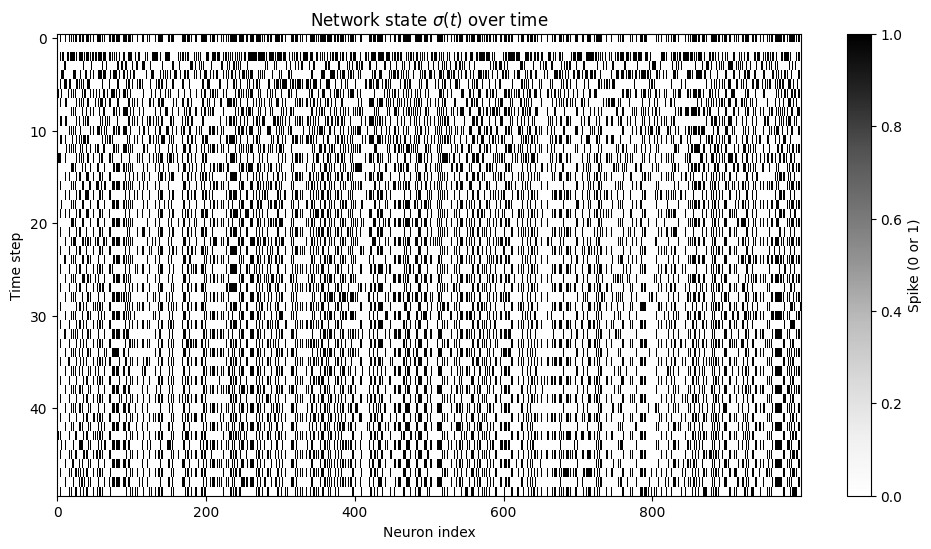

In [49]:
np.random.seed(42)
N = 1000
P = 5
beta = 7
T = 50

patterns = gen_balanced_patterns(P,N)
S = 0.5 * (patterns[0] + 1)
w = next_state(S, patterns)
refractory = np.zeros(N)
states = np.zeros((T,N))
m_list = np.zeros((T,P))

	
for t in np.arange(T) :
	  
	m = (2 / N) * patterns @ S

	h = 0.5 * patterns.T @ m

	prob = 0.5 * (1 + np.tanh(beta * h))
	new_S = (np.random.rand(N) < prob).astype(int)

	# Apply the refractory period: suppress firing of previously active neurons
	new_S[refractory == 1] = 0

	# Update refractory state: neurons that fired now are refractory in next step
	refractory = new_S.copy()

	S = new_S
	states[t, :] = S
	m_list[t, :] = m

print(f'beta = {beta}')
plot_overlap_variables(T, m_list) # Add legend in report

# Plot states as a heatmap
plt.figure(figsize=(12, 6))
plt.imshow(states, aspect='auto', cmap='Greys', interpolation='nearest')
plt.title(rf"Network state $\sigma(t)$ over time")
plt.xlabel("Neuron index")
plt.ylabel("Time step")
plt.colorbar(label="Spike (0 or 1)")
plt.show()


### Exercise 3.5

beta = 7


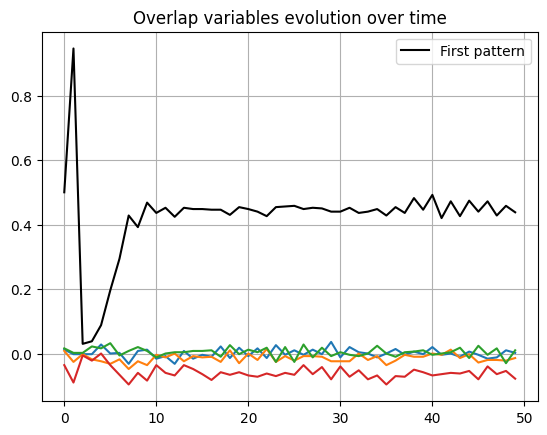

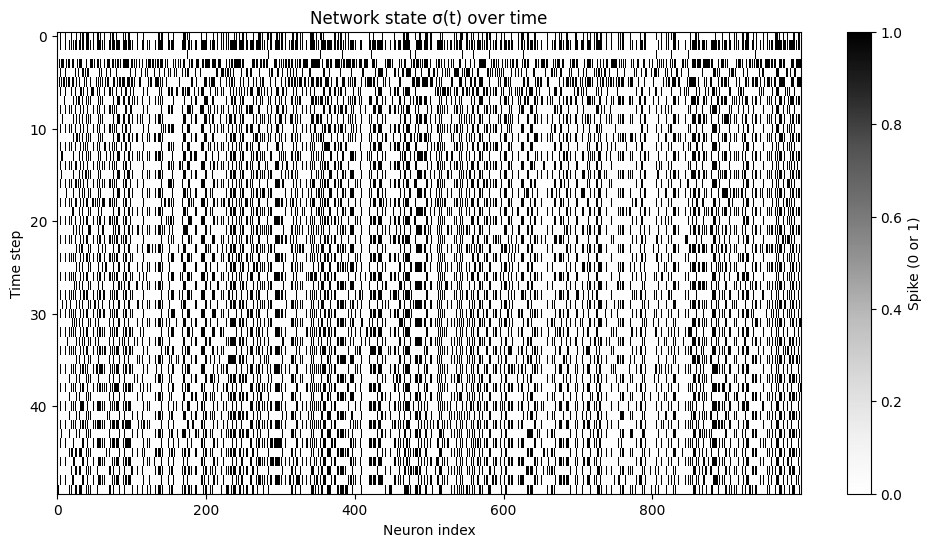

In [ ]:
np.random.seed(42)
N = 1000
P = 5
beta = 7
T = 50

def smart_initialize(pattern):
	"""
	Initialize σ(0) by firing only a subset of the neurons matching the +1 values in pattern.
	This avoids full activation and prevents total silence at t=1.
	"""
	N = len(pattern)
	sigma0 = np.zeros(N)
	# Indices of neurons that should eventually fire (p_i = +1)
	active_indices = np.where(pattern == 1)[0]
	# Randomly choose half of them to fire at t=0
	np.random.shuffle(active_indices)
	half = active_indices[:len(active_indices) // 2]
	sigma0[half] = 1
	return sigma0

patterns = gen_balanced_patterns(P,N)
S = smart_initialize(patterns[0])
refractory = np.zeros(N)
states = np.zeros((T,N))
m_list = np.zeros((T,P))

	
for t in np.arange(T) :
	  
	states[t,:] = S
	m = (2 / N) * patterns @ S
	m_list[t,:] = m

	h = 0.5 * patterns.T @ m

	prob = 0.5 * (1 + np.tanh(beta * h))
	S = (np.random.rand(N) < prob).astype(int)
	S[refractory == 1] = 0

	refractory = S.copy()

	

print(f'beta = {beta}')
plot_overlap_variables(T, m_list) # Add legend in report

# Plot states as a heatmap
plt.figure(figsize=(12, 6))
plt.imshow(states, aspect='auto', cmap='Greys', interpolation='nearest')
plt.title("Network state σ(t) over time")
plt.xlabel("Neuron index")
plt.ylabel("Time step")
plt.colorbar(label="Spike (0 or 1)")
plt.show()

### Exercise 3.6

beta = 5


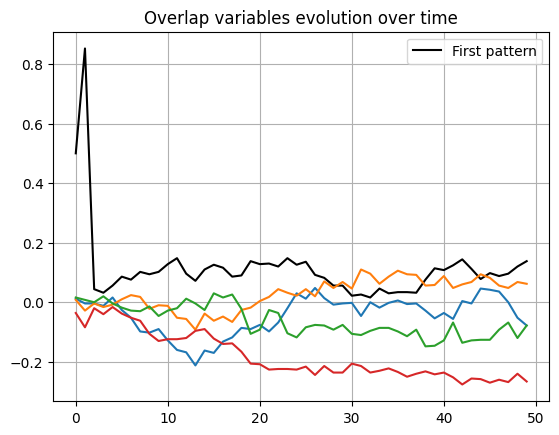

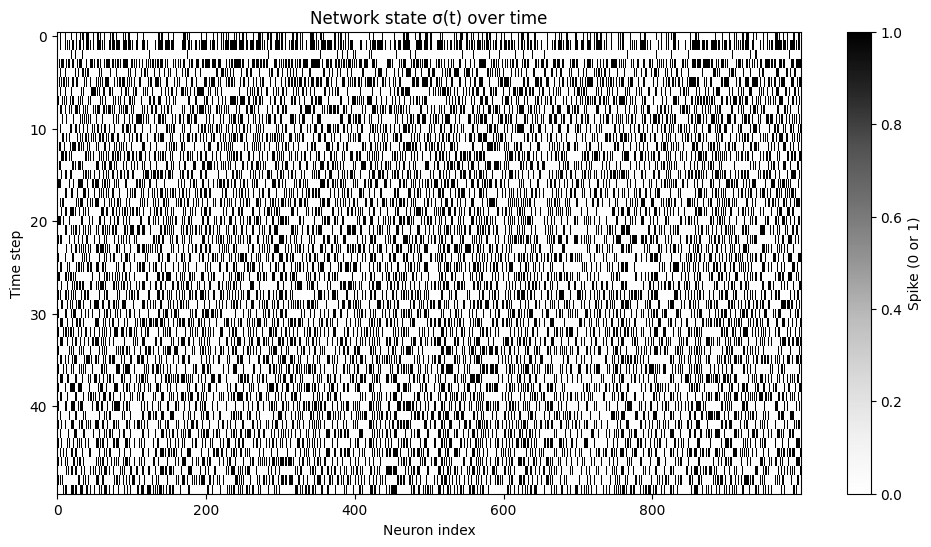

In [ ]:
np.random.seed(42)
N = 1000
P = 5
beta = 5
T = 50

patterns = gen_balanced_patterns(P,N)
S = smart_initialize(patterns[0])
w = next_state(S, patterns)
refractory = np.zeros(N)
states = np.zeros((T,N))
m_list = np.zeros((T,P))

	
for t in np.arange(T) :
	  
	states[t,:] = S
	m = (2 / N) * patterns @ S
	m_list[t,:] = m

	h = 0.5 * patterns.T @ m

	prob = 0.5 * (1 + np.tanh(beta * h))
	S = (np.random.rand(N) < prob).astype(int)
	S[refractory == 1] = 0

	refractory = S.copy()

	

print(f'beta = {beta}')
plot_overlap_variables(T, m_list) # Add legend in report

# Plot states as a heatmap
plt.figure(figsize=(12, 6))
plt.imshow(states, aspect='auto', cmap='Greys', interpolation='nearest')
plt.title("Network state σ(t) over time")
plt.xlabel("Neuron index")
plt.ylabel("Time step")
plt.colorbar(label="Spike (0 or 1)")
plt.show()

### Exercise 3.7

In [ ]:
np.random.seed(42)
beta_list = np.arange(2.0, 7.0)
N = 1000

capacity_array_3_7 = np.zeros((beta_list.shape[0]))

for i, beta in enumerate(beta_list):
	P = 1
	max_P = 0
	while max_P == 0:
		patterns = gen_balanced_patterns(P, N)
		success_all = True
		for j, pattern in enumerate(patterns):
			sigma = 0.5 * (pattern.copy() + 1)
			argmax_history = []
			for t in range(50):
				m = (2 / N) * patterns @ sigma
				h = 0.5 * patterns.T @ m
				prob = 0.5 * (1 + np.tanh(beta * h))
				sigma = (np.random.rand(N) < prob).astype(int)
				current_argmax = np.argmax(m)
				argmax_history.append(current_argmax)
			
			# Most relevant timesteps are the last ten
			last_10 = argmax_history[-10:]
			success_j = all(x == j for x in last_10)

			if not success_j:
				# print('found it!', m, P)
				success_all = False
				break  
		
		if not success_all:
			max_P = P 
			capacity_array_3_7[i] = max_P
			capacity_array_3_7[i] /= N
		else:
			P += 1 
			# print(P)

plt.figure()
plt.title('Capacity as a function of beta')
plt.plot(beta_list, capacity_array_3_7, label="Exercise 3.7")
plt.plot(beta_list, capacity_array_3_2, label="Exercise 3.2")
plt.grid()
plt.show()